*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Emir Chacra

# Laboratorio 0 (Preparación)

Uno de los resultados de aprendizaje esperados en este curso es el desarrollo de capacidades de cálculo científico mediante la implementación práctica de métodos numéricos a través de laboratorios computacionales y del desarrollo de un proyecto semestral en un ámbito más aplicado y de mayor complejidad. 

A lo largo del semestre utilizaremos Python como herramienta principal, puesto que es simple de aprender y tiene comandos que ayudan a la implemntación de los métodos numéricos que se analizarán este semestre.

## Ejercicio 1: Resolución de sistemas lineales

Considere $N=50$, el vector constante $\textbf{b}\in\mathbb{R}^{2N}$, el cual tiene todas sus componentes iguales a $1$, y las matrices $A\in\mathbb{R}^{2N\times 2N}$ y $B\in\mathbb{R}^{N\times N}$ dadas por 

$$ \textbf{B} = \begin{pmatrix}
2 & -1 & 0 & \dots & 0 \\
-1 & 2 & -1 & \ddots & \vdots \\
0 & -1 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & -1 \\
0 & \dots & 0 & -1 & 2 
\end{pmatrix}
\ \ \ \  A =  \begin{pmatrix}
\textbf{B} & \mathbf{0} \\
\mathbf{0} & \textbf{B} 
\end{pmatrix}  $$

donde $\mathbf{0}$ es la matriz nula en $\mathbb{R}^{N\times N}$. Queremos resolver el sistema de ecuaciones $Ax = \textbf{b}$

El objetivo de esta primera parte es conocer los comandos que nos permiten resolverlo en python.

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as spsp
import scipy.sparse.linalg as spl

Primero, introduciremos la forma de trabajar matrices $\texttt{sparse}$.

In [2]:
N = 2

e = np.ones(N) #Este comando define un vector de largo n lleno de 1's. Existe también np.zeros.
f = np.ones(N-1)
k = np.array([-f,2*e,-f], dtype= object) #Lista con los vectores
offset = [-1,0,1] #Posiciones respecto a la diagonal en que se ubicarán los vectores

In [3]:
B = sp.sparse.diags(k,offset) #Definir matriz sparse diagonal

In [4]:
A = sp.sparse.bmat([[B,None],[None,B]], format= 'csc') #Definir matriz sparse por bloques

b = np.ones((2*N,1)) #Vector columna

In [5]:
x = sp.sparse.linalg.spsolve(A,b)

Otras funciones útiles

In [6]:
#Norma euclidiana
norma_2 = np.linalg.norm(x,2)

#Norma matricial inducida por la norma 2
norma_A_2 = sp.sparse.linalg.norm(A,1)

#Norma de Frobenius
norma_A_fro = sp.sparse.linalg.norm(A,'fro')

#Cálculo de valores y vectores propios
vals, vecs = sp.sparse.linalg.eigs(A,2)

In [7]:
# OJO: No se pueden operar matrices sparse con matrices normales. Hay que transformarlas.
A = A.todense() #Para transformar de scipy a numpy.
A = sp.sparse.csc_matrix(A) #Para transformar de numpy a scipy.

#Para multiplicar matrices se utiliza @
A2 = A@A 

## Ejercicio 2: Gráficos

¿Cómo se definen funciones en $\texttt{Python}$? ¿Gráficos de $2$ o $3$ dimensiones?

Graficaremos las funciones $f(x)= x^2$ y $g(x) = 5 \cos(x) + 4$ en el intervalo $[-3,3]$.

In [8]:
f = lambda x : x**2
g = lambda x : 5*np.cos(x) + 4

a = -3
b = 3

#Tomamos N como la cantidad de puntos interiores.
N = 10
h = (b-a)/(N+1)

# Existen dos formas de discretizar un intevalo:
x1 = np.arange(a, b+h, h) #El último parámetro es el "h" del intervalo. No incluye el extremo superior.
x2 = np.linspace(a, b, N+2) #El último parámetro es la cantidad de puntos. Incluye los extremos.

# Usen la que más le acomode.
print(x1==x2)

[ True  True  True  True  True  True  True  True  True  True  True  True]


In [9]:
# Ahora, si evalúan la función en un vector, devolverá un vector con las evaluaciones.
y_f = f(x1)
y_g = g(x1)

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

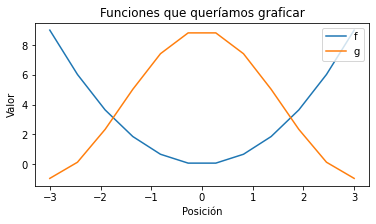

In [11]:
# Definamos una figura para graficar.

fig = plt.figure(figsize=(6, 3)) #Bueno para elegir el porte con figsize
plt.plot(x1, y_f, label= 'f')
plt.plot(x1, y_g, label= 'g')
plt.xlabel('Posición')
plt.ylabel('Valor')
plt.title('Funciones que queríamos graficar')
plt.legend(loc = 'upper right') #Para que se impriman las leyendas y elegir su ubicación
#plt.savefig('funcs_1d.pdf') #Para guardar los gráficos. Quedan en el directorio donde tienen su notebook
plt.show() #Para mostrar los gráficos

Ahora, veremos formas de graficar funciones en $2$ variables.

Las que más usaremos son dos: curvas de nivel y gráficos de superficie.

 Probemos con la función $h(x,y)= x^3 - y^3$ definida en $[-1,1]^2$.
 
 ¿Cómo definimos los dominios en dos dimensiones?

In [12]:
# Las funciones con más argumentos se definen de la misma manera.
h = lambda x,y: x**3 - y**3

#Podemos usar cualquiera de las dos formas para definir los intervalos

xx = np.linspace(-1,1,100)
yy = np.linspace(-1,1,200)
#No es necesario que sean del mismo largo! Quizás necesitamos más resolución en una dimensión.

#Ahora definimos una grilla.
X, Y = np.meshgrid(xx, yy, indexing= 'ij')
# Y en este caso la matriz con la función evaluada.
Z = h(X,Y)

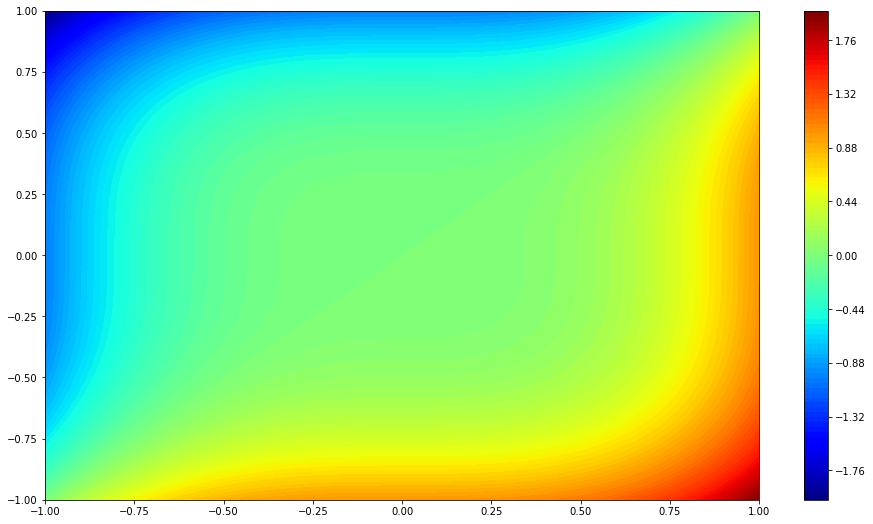

In [13]:
# Graficamos primero las curvas de nivel:
fig = plt.figure(figsize=(16,9))
graf = plt.contourf(X,Y,Z, 100, cmap='jet') #El número es la cantidad de curvas de nivel que se desean
fig.colorbar(graf)

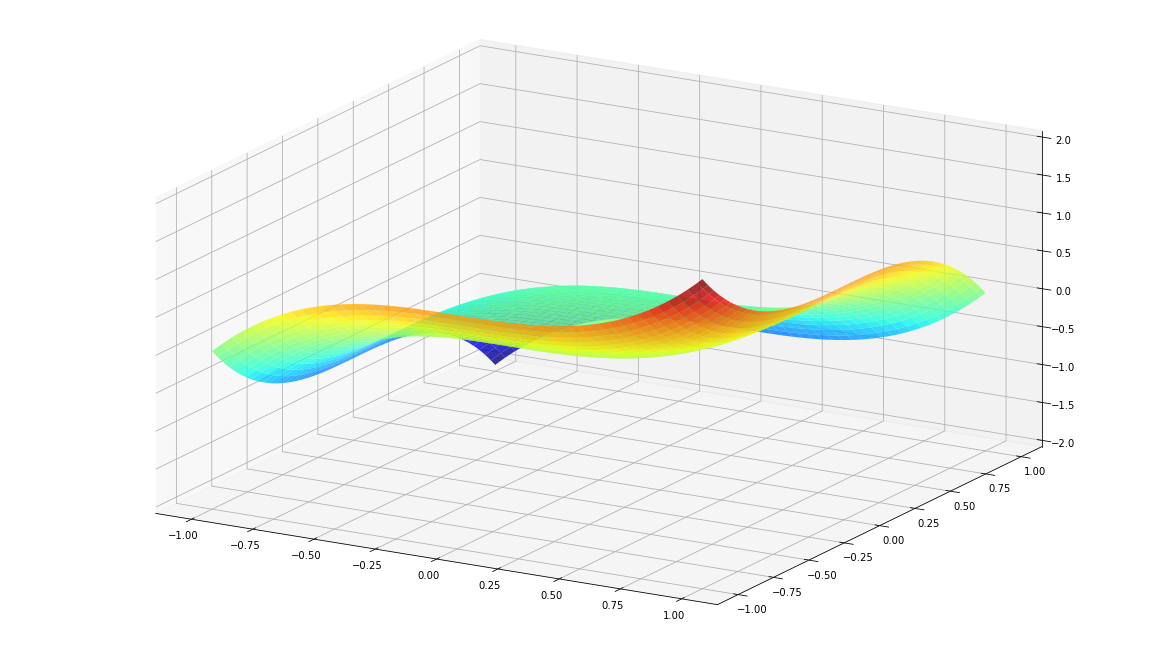

In [14]:
# Ahora, podemos utilizar gráficos de superficie
fig = plt.figure(figsize=(16,9))
ax   = Axes3D(fig)
ax.plot_surface(X, Y, Z, alpha= 0.8, cmap='jet')
ax.set_proj_type('ortho') #Ángulo en que se mira el gráfico
plt.show()

## Ejercicio 3: Resolución con diferencias finitas

El objetivo de esta sesión es introducir al método de diferencias finitas mediante un problema sencillo en una dimensión. Para ello, considere el siguiente problema de valores de frontera:

$$
(1)
\quad
\left\{
\begin{align}
- u^{\prime\prime}(x)+u^{\prime}(x)  &  =1\qquad\text{sobre
}\left(  0,1\right) \nonumber\\
u\left(  0\right)   &  =a\label{P1}\\
u\left(  1\right)   &  =b\nonumber
\end{align}
\right.
$$



Se supone que la solución es suficientemente regular.

Considere $N\in\mathbb{N}$ y $h=\frac{1}{N+1}$. Se define la discretización uniforme del intervalo $\left[  0,1\right]  $ como el conjunto $\left\{x_{j}\right\}  _{j=0}^{N+1}\subseteq\left[  0,1\right]  $, donde $x_{j}=jh$ para $j\in\left\{  0,\ldots,N+1\right\}  $. Se denota $u_{i}$ a la aproximación de $u\left(  x_{i}\right)  $. Observe que la discretización del dominio considera $N+1$ intervalos de igual tamaño y $N+2$ puntos equiespaciados.

Recordamos las aproximaciones centradas para la primera y la segunda derivada:
$$
u_i' = \frac{u_{i+1} - u_{i-1}}{2h} + \mathcal{O}(h^2)
$$

$$
u_i'' = \frac{u_{i-1} -2u_i + u_{i+1}}{h^2} + \mathcal{O}(h^2)
$$

Esto nos permite escribir el problema discretizado

\begin{align*}
- \frac{u_{i-1} -2u_i + u_{i+1}}{h^2} + \frac{u_{i+1} - u_{i-1}}{2h} &= 1 \\
u_0 & = a\\
u_{N+1} &= b
\end{align*}

Reescribimos para $i=1,...,N$:
$$
\frac{1}{h^2}
\big(
(-1 - 0.5h)u_{i-1}
+
2 u_i
+
(-1+ 0.5h)
u_{i+1}
\big) 
= 1
$$

Mientras que para los puntos de borde, se respetan las condiciones de borde.

Notemos que las ecuaciones anteriores se pueden escribir como un sistema lineal de la forma 

$$\boldsymbol{A}_{h}\boldsymbol{U}_{h}=\boldsymbol{B}_{h}$$

### Parte 1

**a.** Calcule la matriz $\boldsymbol{A}_{h}$ y escriba una función que la defina. El argumento de la función debe ser solamente $N$, y la salida es una matriz $\texttt{sparse}$ $\boldsymbol{A}$ que contiene los coeficientes de $\boldsymbol{A}_{h}$.

$$ \boldsymbol{A}_{h} =
\frac{1}{h^2}
\begin{pmatrix}
                   1 & 0            & \dots               &                      & \dots        & 0                  \\
-1-0.5*h & 2 & -1+0.5*h & 0                    & \dots        & 0                  \\
0                    & \ddots       & \ddots              & \ddots               & \ddots       & \vdots             \\
\vdots               & \ddots       & & & & 0\\
0                    & \dots        & 0                   & -1-0.5*h & 2 & -1+0.5*h\\
0                    & \ddots       &                     &                      & 0            & 1 \\
\end{pmatrix}_{(N+2)\times (N+2)}
$$

In [32]:
def CalculaA(N):
    """
    Calcula la matriz A_h que resulta de discretizar el problema (1).
    --------
    Input:
    - N: int > 0
        Se usara una discretizacion en N+1 subintervalos
    --------
    Output:
    - A: matriz sparse de (N+2)x(N+2)
        Matriz A_h, como matriz sparse en formato 'csr'.
        Para pasarla a array de numpy hacer A.toarray().
    """
    h=1/(N+1)
    e = np.ones(N+2) #Este comando define un vector de largo n lleno de 1's. Existe también np.zeros.
    f = np.ones(N+1)
    g=2*e
    g[0]=1
    g[-1]=1
    f1=(-1-0.5*h)*f
    f1[-1]=0
    f2=(-1+0.5*h)*f
    f2[0]=0
    k = np.array([f1,g,f2], dtype= object) #Lista con los vectores
    offset = [-1,0,1] 
    A = sp.sparse.diags(k,offset) #Definir matriz sparse diagonal
    return A*1/(h**2)

In [26]:
CalculaA(5).todense()

matrix([[ 36.,   0.,   0.,   0.,   0.],
        [-39.,  72., -33.,   0.,   0.],
        [  0., -39.,  72., -33.,   0.],
        [  0.,   0., -39.,  72., -33.],
        [  0.,   0.,   0.,   0.,  36.]])

**b.** Calcule el lado derecho $\boldsymbol{B}_{h}$ y escriba una función para construirlo. La entrada de la función debe ser el valor de $N$, $a$, $b$ y la salida $\boldsymbol{B}$ contiene el vector $\boldsymbol{B}_{h}$.

$$ \boldsymbol{B}_{h} =
\begin{pmatrix}
0 \\
1 \\
\vdots \\
1 \\
0
\end{pmatrix}_{(N+2)\times 1}$$

In [43]:
def CalculaB(N,a,b):
    """  Calcula el vector B_h que resulta de discretizar el problema (1).
    --------
    Input:
    - N: int > 0
        Se usara una discretizacion en N+1 subintervalos
    - a: float
        Valor de la condicion en 0 
    - b: float
        Valor de la condicion en 1
    --------
    Output:
    - B: numpy array de largo (N-1)
        Vector B_h
    """
    h=1/(N+1)
    s = np.ones((N+2,1)) 
    s[0]=a/(h**2)
    s[-1]=b/(h**2)
    return s


### Parte 2

Considere $a=b=0$. La solución analítica de $(1)$ es única e igual a la función
$$
\left(  \forall x\in\left[  0,1\right]  \right) \quad\theta
(x)=x-\dfrac{e^x -1}{e-1}
$$


**a.** Escriba una función para construir el vector $\boldsymbol{\theta}%_{h}=(\theta(x_{1}),\ldots,\theta(x_{N}))^{T}$. La entrada de la función debe ser $N$ y la salida debe ser un vector $\boldsymbol{\theta}$.


In [60]:
def CalculaSol(N):
    """
    Calcula la solucion analitica para la ecuacion (1) con parametro epsilon.
    --------
    Input:
   Input:
    - N: int > 0
        Se usara una discretizacion en N+1 subintervalos
    -------
    Output:
    - theta: 
        Vector con las evaluaciones de todos los puntos de la grilla en la solucion analitica.
    """
    h = 1/(N+1)
    x1 =np.linspace(0, 1, N+2)
    theta=lambda x: x-(np.e**x-1)/(np.e-1)
    return theta(x1)

**b.** Resuelva el sistema de ecuaciones considerando las condiciones de frontera usando adecuadamente las funciones `CalculaA` y `CalculaB` antes definidas. Para $N\in\left\{5,20\right\}$, grafique en un mismo gráfico la solución real y numérica de este problema. Explique qué sucede.

In [71]:
# No es necesario que se tenga una funcion general para condiciones a, b cualquiera
# Hasta aqui basta con suponer a = b = 0
def resolver(N, a, b):
    """
    Resuelve el problema (1) discretizando [0,1] en N subintervalos equiespaciados.
    --------
    Input:
    - N: int > 0
        Se usara una discretizacion en N+1 subintervalos
    - a: float
        Valor de la solucion en 0
    - b: float
        Valor de la solucion en 1
    --------
    Output:
    - x: numpy array largo (N+1)
        Grilla usada
    - aprox: numpy array de largo (N+1)
        Solucion aproximada al problema (1) en los puntos de la grilla.
    """
    h = 1/(N+1)
    x1 = np.linspace(0, 1, N+2)
    A=CalculaA(N)
    bb=CalculaB(N,a,b)
    aprox = sp.sparse.linalg.spsolve(A,bb)
    return x1, aprox

In [82]:
def graficar_solucion(x, aprox, dots):
    """
    Hace un grafico de lineas, poniendo puntos en (x_i, aprox_i).
    Supone que ya se ha creado una figura de matplotlib.pyplot. 
    --------
    Input:
    - x: numpy array 
        discretizacion del eje-x
    - aprox: numpy array
        Del mismo largo que x, los valores a graficar
    - dots: boolean
        Si dots = true, agrega puntos al grafico.
    """
    N = len(x)-2
    if dots:
        mark = '.-'
    else:
        mark = '-'
    y=CalculaSol(N)
    plt.plot(x, aprox, mark, label = 'Solución aproximada N=' + str(N) + '')
    plt.plot(x, y , mark, label = 'Solución analítica N=' + str(N) + '')
    plt.xlabel('Posición')
    plt.ylabel('Valor')
    plt.title('Funciones que queríamos graficar')
    plt.legend(loc = 'upper right') #Para que se impriman las leyendas y elegir su ubicación
    plt.show()
    #plt.savefig('funcs_1d.pdf') #Para guardar los gráficos. Quedan en el directorio donde tienen su notebook

C:\Users\artur\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


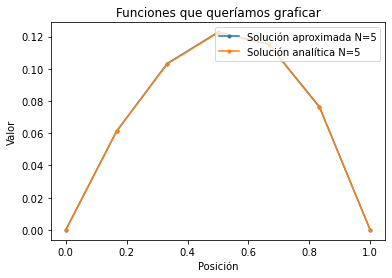

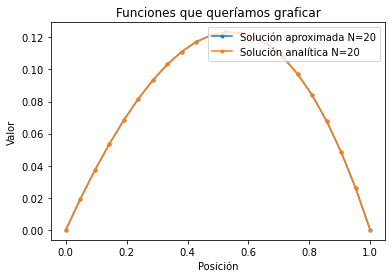

In [83]:
x,aprox=resolver(5,0,0)
x2,aprox2=resolver(20,0,0)
graficar_solucion(x, aprox, True)
graficar_solucion(x2, aprox2, True)

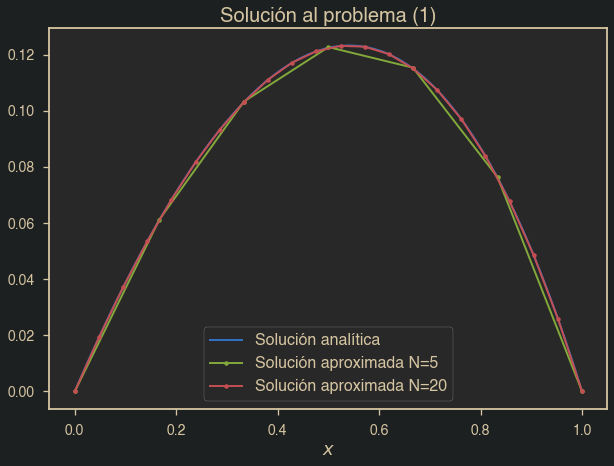

**c.** Calcule la norma $2$ del error de aproximación $\boldsymbol{e}%_{h}=\boldsymbol{\theta}_{h}-\boldsymbol{U}_{h}$ para $N\in\left\{10\cdot2^{k}\mid k\in\left\{  0,\ldots5\right\}  \right\}  $. Grafique los respectivos valores en función de $h$ (en escala logarítmica, revise el comando `plt.loglog`). ¿Qué puede observar?

In [85]:
def calcular_errores(Ns):
    """
    Calcula el vector de errores de la solucion al problema (1)
    para una lista de valores de N.
    """
    hs=[]
    error=[]
    for n in Ns:
        hs.append(1/(n+1))
        s1=CalculaSol(n)
        s2=resolver(n,0,0)[1]
        error.append(np.linalg.norm(s1-s2,2))
    return hs, error

Text(0.5, 1.0, 'Error de aproximación')

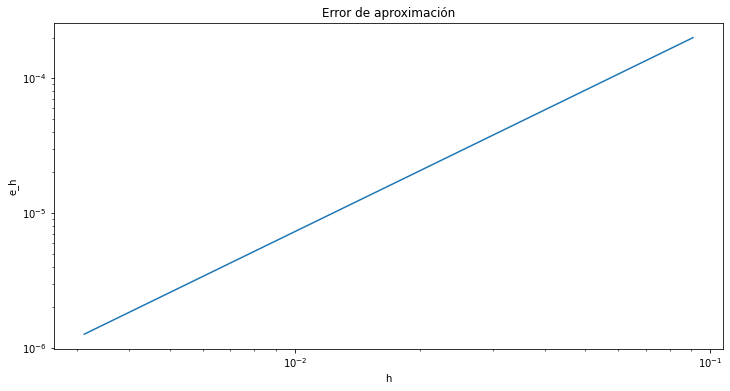

In [94]:
N=[]
for i in range(6):
    N.append(10*(2**i))
ce=calcular_errores(N)
fig = plt.figure(figsize=(12, 6)) #Bueno para elegir el porte con figsize
plt.plot(ce[0], ce[1], label= 'f')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('e_h')
plt.title('Error de aproximación')
#fig.set_xscale('log')

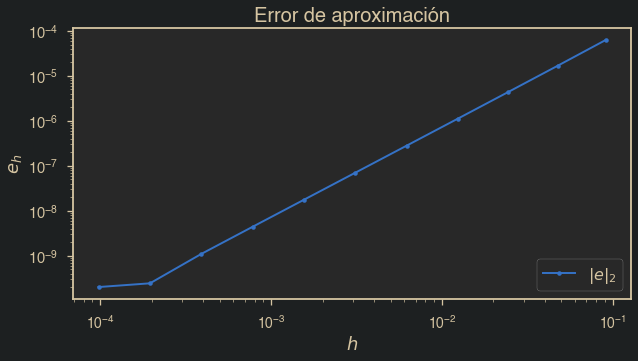

*Al ver el error en escala logarítmica se observa un comportamiento lineal.*